# Visual Analysis of Top-100 Athlete Pay by Year, 2012-2019
It's clear to most that sports are big business. It seems like every week we're hearing about a new record contract for an NFL Quarterback, or a boxer inking a 7-figure-plus deal for a single fight. Athlete compensation is a frequent topic of conversation, especially as the money involved continues to soar.

Forbes releases an annual list of the top-100 highest paid athletes, including a breakdown of their Salary & Winnings vs Endorsement Deals. The dataset we'll be analyzing has the details for all 100 athletes for each year of the survey from 2012-2019. We aim to uncover any interesting trends and insights present in the data, and present them via meaningful visualizations.

## Importing Libraries 

In [554]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Loading and Exploring the Dataset

In [555]:
df = pd.read_csv('D:/Springboard/Forbes Athlete List 2012-2019.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             800 non-null    object
 1   Name             800 non-null    object
 2   Pay              800 non-null    object
 3   Salary/Winnings  800 non-null    object
 4   Endorsements     800 non-null    object
 5   Sport            800 non-null    object
 6   Year             800 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 43.9+ KB
None


In [556]:
df.head()

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year
0,#1,Lionel Messi,$127 M,$92 M,$35 M,Soccer,2019
1,#2,Cristiano Ronaldo,$109 M,$65 M,$44 M,Soccer,2019
2,#3,Neymar,$105 M,$75 M,$30 M,Soccer,2019
3,#4,Canelo Alvarez,$94 M,$92 M,$2 M,Boxing,2019
4,#5,Roger Federer,$93.4 M,$7.4 M,$86 M,Tennis,2019


We see right away that the 3 compensation columns have dollar signs and M's, which would prevent us from doing any numerical analysis. We'll need to address this first.

In [557]:
df['Pay_Mag'] = df['Pay'].str[-1:]
df['Salary/Winnings_Mag'] = df['Salary/Winnings'].str[-1:]
df['Endorsements_Mag'] = df['Endorsements'].str[-1:]

In [558]:
df['Pay'] = df['Pay'].str[1:]
df['Salary/Winnings'] = df['Salary/Winnings'].str[1:]
df['Endorsements'] = df['Endorsements'].str[1:]

In [559]:
df['Pay'] = df['Pay'].str[:-2]
df['Salary/Winnings'] = df['Salary/Winnings'].str[:-2]
df['Endorsements'] = df['Endorsements'].str[:-2]

In [560]:
df['Pay'] = df['Pay'].astype('float')
df['Salary/Winnings'] = df['Salary/Winnings'].astype('float')
df['Endorsements'] = df['Endorsements'].astype('float')

In [561]:
df['Pay_Mag'] = np.where(df['Pay_Mag']=='M', 1000000, 1000)
df['Salary/Winnings_Mag'] = np.where(df['Salary/Winnings_Mag']=='M', 1000000, 1000)
df['Endorsements_Mag'] = np.where(df['Endorsements_Mag']=='M', 1000000, 1000)

In [562]:
df['Pay'] = df['Pay'] * df['Pay_Mag']
df['Salary/Winnings'] = df['Salary/Winnings'] * df['Salary/Winnings_Mag']
df['Endorsements'] = df['Endorsements'] * df['Endorsements_Mag']


In [563]:
df.drop(columns = ['Pay_Mag', 'Salary/Winnings_Mag', 'Endorsements_Mag'], inplace=True)

In [564]:
df['Pay'] = df['Pay'] / 1000000
df['Salary/Winnings'] = df['Salary/Winnings'] / 1000000
df['Endorsements'] = df['Endorsements'] / 1000000
df.head()

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year
0,#1,Lionel Messi,127.0,92.0,35.0,Soccer,2019
1,#2,Cristiano Ronaldo,109.0,65.0,44.0,Soccer,2019
2,#3,Neymar,105.0,75.0,30.0,Soccer,2019
3,#4,Canelo Alvarez,94.0,92.0,2.0,Boxing,2019
4,#5,Roger Federer,93.4,7.4,86.0,Tennis,2019


Now let's take a look at our 'Sport' column, and see if it needs any work.

In [565]:
df['Sport'].value_counts()

Basketball            194
Baseball              180
Football              149
Soccer                 96
Tennis                 46
Golf                   41
Racing                 31
Boxing                 29
Auto Racing            10
Cricket                 9
Track                   7
Mixed Martial Arts      3
Motorcycle              2
Basketbal               1
Auto racing             1
MMA                     1
Name: Sport, dtype: int64

It's clear that there is some consolidation and clean-up that can happen here. 

For one, there's one entry that's simply a typo (Basketbal).

In [566]:
df['Sport'] = df['Sport'].replace(['Basketbal'],'Basketball')

We also have entries for both 'Mixed Martial Arts' and the associated acronym 'MMA', which can be combined.

In [567]:
df['Sport'] = df['Sport'].replace(['MMA'],'Mixed Martial Arts')

The area with the most room for clean-up is motor racing. The first thing we notice is that we have both an 'Auto Racing' and an 'Auto racing' category, but we also see one simply labeled 'Racing'. We suspect this belongs with 'Auto Racing' and not with 'Track', but we should check it to verify.

In [568]:
df.loc[df['Sport'] == 'Racing']

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year
310,#11,Lewis Hamilton,46.0,42.0,4.0,Racing,2016
323,#24,Fernando Alonso,36.5,35.0,1.5,Racing,2016
371,#71,"Dale Earnhardt, Jr.",23.5,15.0,8.5,Racing,2016
381,#82,Jimmie Johnson,22.2,16.2,6.0,Racing,2016
397,#98,Nico Rosberg,21.0,20.0,1.0,Racing,2016
414,#15,Lewis Hamilton,39.0,36.0,3.0,Racing,2015
416,#17,Fernando Alonso,35.5,34.0,1.5,Racing,2015
420,#21,Sebastian Vettel,38.5,38.0,0.5,Racing,2015
432,#32,Kimi Raikkonen,27.0,25.0,2.0,Racing,2015
454,#55,"Dale Earnhardt, Jr.",23.6,14.6,9.0,Racing,2015


The list of 'Racing' athletes is full of Formula 1 and Nascar drivers, so we can confirm they belong in the 'Auto Racing' category. Additionally, we can further add 'Motorcycle' to this grouping to create a more complete 'Motorsport' category.

In [569]:
df['Sport'] = df['Sport'].replace(['Racing'],'Motorsport')
df['Sport'] = df['Sport'].replace(['Auto Racing'],'Motorsport')
df['Sport'] = df['Sport'].replace(['Auto racing'],'Motorsport')
df['Sport'] = df['Sport'].replace(['Motorcycle'],'Motorsport')
df['Sport'].value_counts()

Basketball            195
Baseball              180
Football              149
Soccer                 96
Tennis                 46
Motorsport             44
Golf                   41
Boxing                 29
Cricket                 9
Track                   7
Mixed Martial Arts      4
Name: Sport, dtype: int64

This looks much better!

We also notice that similar to the compensation columns, our ranking column includes a '#' before the rank integer. We'll strip this as well and re-cast the Rank column as an integer instead of a string.

In [570]:
df['Rank'] = df['Rank'].str[1:]
df['Rank'] = df['Rank'].astype('int')
df.head()


,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year
0,1,Lionel Messi,127.0,92.0,35.0,Soccer,2019
1,2,Cristiano Ronaldo,109.0,65.0,44.0,Soccer,2019
2,3,Neymar,105.0,75.0,30.0,Soccer,2019
3,4,Canelo Alvarez,94.0,92.0,2.0,Boxing,2019
4,5,Roger Federer,93.4,7.4,86.0,Tennis,2019


One thing that isn't included in the data is whether the athlete plays a team or individual sport. Using our sports knowledge, we can create a new column that tracks this.

In [365]:
df['Pct_Sal'] = df['Salary/Winnings'] / df['Pay']
df['Pct_End'] = 1 - df['Pct_Sal']
df.head()

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year,Team_or_Ind,Pct_Sal,Pct_End
0,1,Lionel Messi,127.0,92.0,35.0,Soccer,2019,Team,0.724409,0.275591
1,2,Cristiano Ronaldo,109.0,65.0,44.0,Soccer,2019,Team,0.596330,0.403670
2,3,Neymar,105.0,75.0,30.0,Soccer,2019,Team,0.714286,0.285714
3,4,Canelo Alvarez,94.0,92.0,2.0,Boxing,2019,Ind,0.978723,0.021277
4,5,Roger Federer,93.4,7.4,86.0,Tennis,2019,Ind,0.079229,0.920771


In [571]:
def sport_type (row):
    if row['Sport'] == 'Basketball':
        return 'Team'
    if row['Sport'] == 'Baseball':
        return 'Team'
    if row['Sport'] == 'Football':
        return 'Team'
    if row['Sport'] == 'Soccer':
        return 'Team'
    if row['Sport'] == 'Tennis':
        return 'Ind'
    if row['Sport'] == 'Motorsport':
        return 'Ind'
    if row['Sport'] == 'Golf':
        return 'Ind'
    if row['Sport'] == 'Boxing':
        return 'Ind'
    if row['Sport'] == 'Cricket':
        return 'Team'
    if row['Sport'] == 'Track':
        return 'Ind'
    if row['Sport'] == 'Mixed Martial Arts':
        return 'Ind'
    return 'Other'

df['Team_or_Ind'] = df.apply(sport_type, axis=1) 

df.head()

,Rank,Name,Pay,Salary/Winnings,Endorsements,Sport,Year,Team_or_Ind
0,1,Lionel Messi,127.0,92.0,35.0,Soccer,2019,Team
1,2,Cristiano Ronaldo,109.0,65.0,44.0,Soccer,2019,Team
2,3,Neymar,105.0,75.0,30.0,Soccer,2019,Team
3,4,Canelo Alvarez,94.0,92.0,2.0,Boxing,2019,Ind
4,5,Roger Federer,93.4,7.4,86.0,Tennis,2019,Ind


We'll perform much of our analysis on the full lists of 100 athletes, but we might also want to take a look at just the top ten, so we'll create a new simplified dataframe for that purpose.

In [572]:
df_topten = df.loc[df['Rank'] <= 10]
df_top = df.loc[df['Rank'] == 1]

df_topten_group = df_topten.groupby(['Year','Sport']).agg({'Pay': 'sum'}).reset_index()

df_topten_group.head(10)

,Year,Sport,Pay
0,2012,Basketball,105.3
1,2012,Boxing,147.0
2,2012,Football,42.4
3,2012,Golf,107.2
4,2012,Soccer,88.5
5,2012,Tennis,52.7
6,2013,Basketball,121.7
7,2013,Football,100.0
8,2013,Golf,126.8
9,2013,Soccer,132.5


Now we can begin looking at the data! The first question that comes to mind is:

### Which sports have the most athletes on the list? Is this skewed toward either team or individual sports?

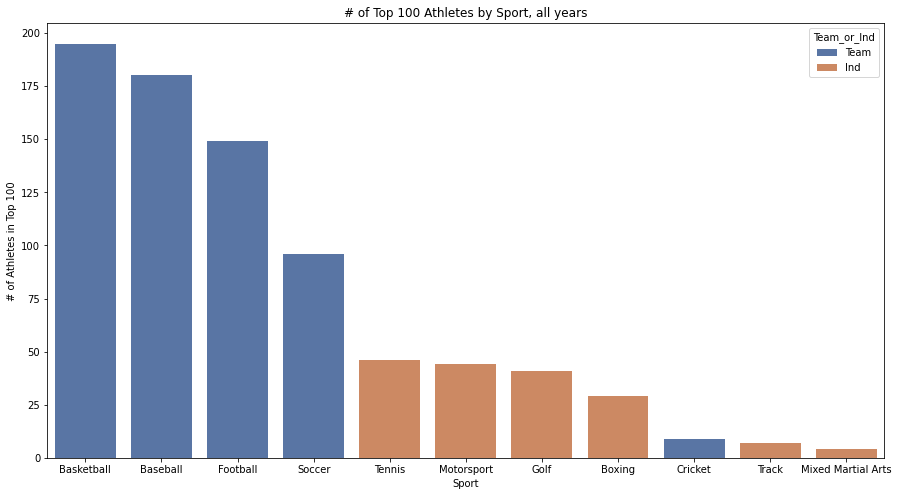

In [361]:
sns.set_palette("deep")
plt.figure(figsize = (15,8))
ax = sns.countplot(x="Sport", data=df, order=df['Sport'].value_counts().index, hue='Team_or_Ind', dodge=False)
ax.set(xlabel='Sport', ylabel='# of Athletes in Top 100', title='# of Top 100 Athletes by Sport, all years')
plt.show()

From this bar chart, it's clear that the "Big 3" in the US (Basketball, Baseball, and Football) dominate the lists in representation, followed in a distant 4th by Soccer. All of the top 4 are Team Sports, with the Individual sports lagging well behind. 

This makes some intuitive sense, given that the pools of athletes are so much larger.

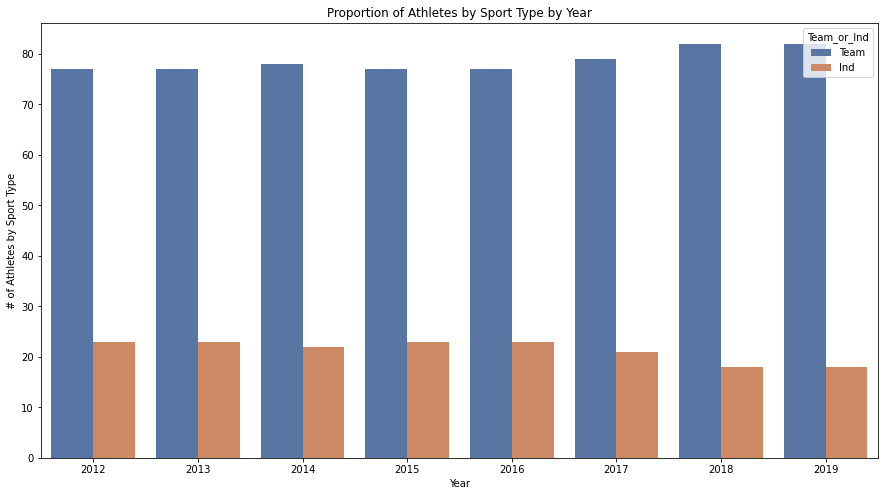

In [364]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x="Year", data=df, hue='Team_or_Ind')
ax.set(xlabel='Year', ylabel='# of Athletes by Sport Type', title='Proportion of Athletes by Sport Type by Year')
plt.show()

This second bar chart provides another view of the breakdown of the top 100 by Team or Individual athletes. It's clear from this chart that not only is the gap between the two in terms of # of athletes on the list substantial, it's also been growing even wider since 2016.

### How has the proportion of Total Pay for each sport changed over the years?

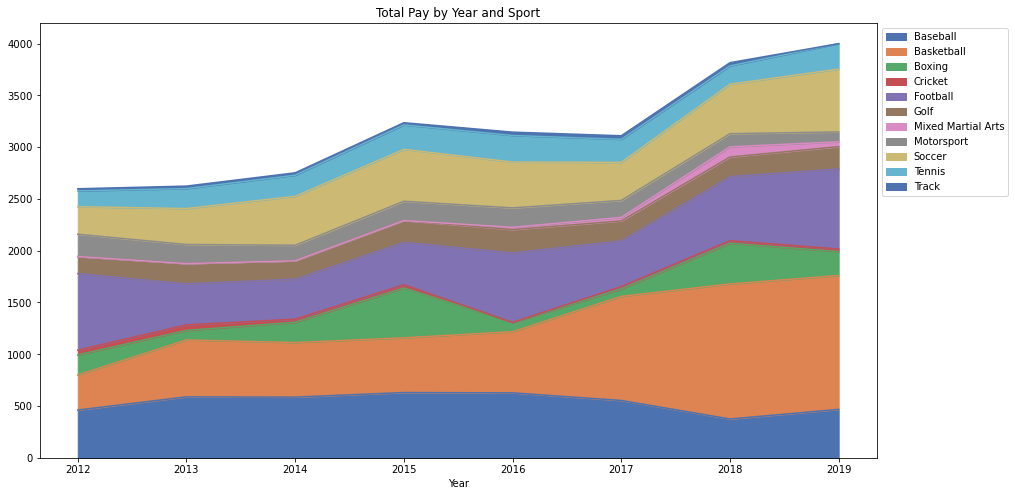

In [451]:
df_agg_big.plot.area(figsize=(15,8))

plt.title('Total Pay by Year and Sport')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

We can glean quite a few interesting things from this chart. First, it's very evident that the total pool of pay for the Top 100 has steadily increased over the years, going from just over 2.5 Billion dollars in 2012 to nearly 4 Billion by 2019.

We're also able to see some changes in share. The most notable is definitely the increase in Basketball, which has increased rapidly since 2016. Baseball has actually seen a small dip after holding rather steady from 2013-2017. We also see that Boxing has a couple of sharp peaks in 2015 and 2018, which we'll look at more closely later.

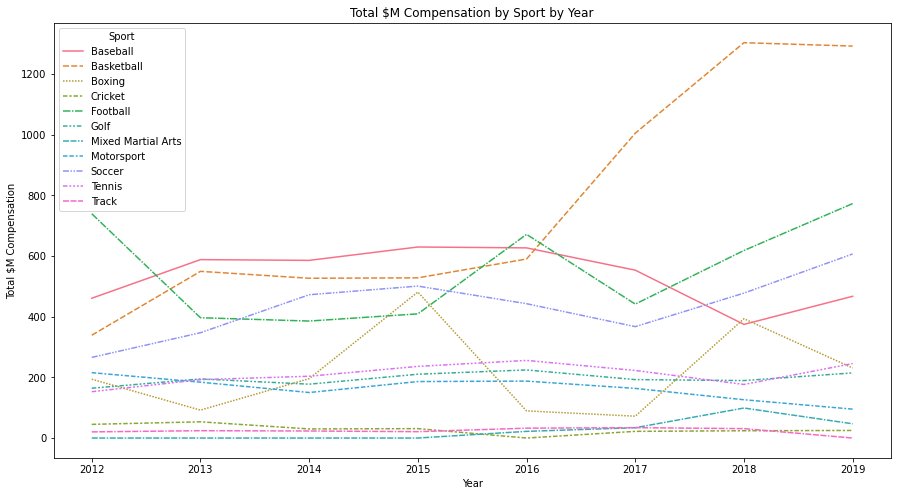

In [426]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_agg_big)
ax.set(xlabel='Year', ylabel='Total $M Compensation', title='Total $M Compensation by Sport by Year')
plt.show()

This unstacked version of the line chart helps illustrate the rapid growth of Basketball value and steady decline in Baseball.

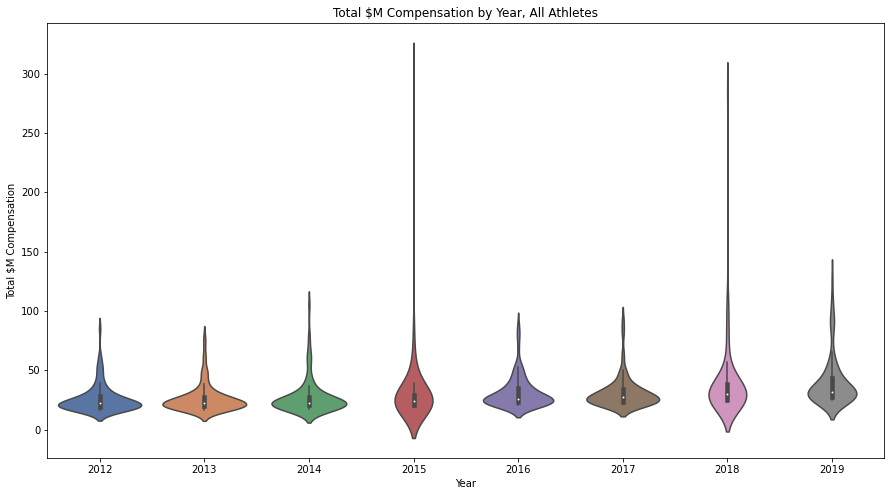

In [428]:
plt.figure(figsize = (15,8))
ax = sns.violinplot(x='Year', y='Pay', data=df)
ax.set(xlabel='Year', ylabel='Total $M Compensation', title='Total $M Compensation by Year, All Athletes')
plt.show()

This violin chart is an interesting representation of the distribution of different compensation levels by year. Very visible again are the huge outliers caused by those Boxing peaks in 2015 and 2018, completely changing the scale of the chart.

But what about the makeup of compensation by sport? 

## Do the rankings change if you split pay between Salary/Winnings and Endorsement Deals? 

First let's look at totals for each form of compensation by sport:

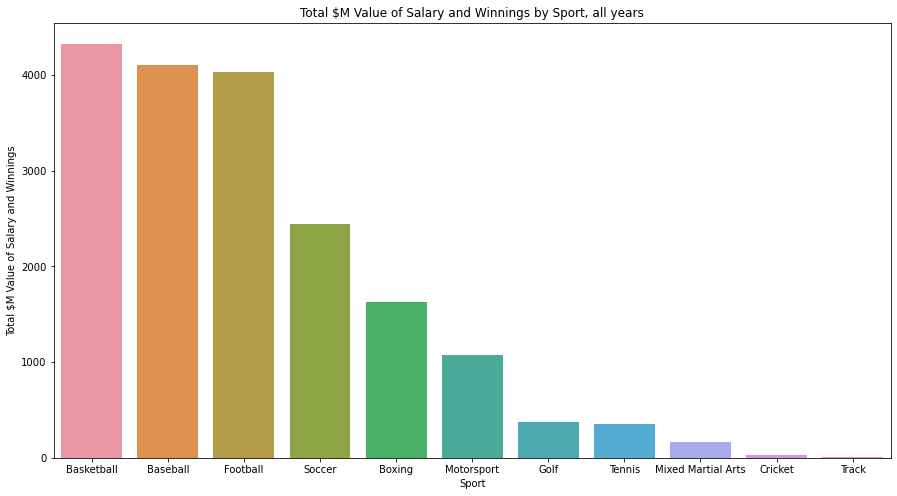

In [363]:
plt.figure(figsize = (15,8))
df_SW = df.groupby('Sport')['Salary/Winnings'].sum().reset_index()

df_SW = df_SW.sort_values('Salary/Winnings',ascending=False).reset_index()

ax = sns.barplot(x='Sport', y='Salary/Winnings', data=df_SW, order=df_SW['Sport'])
ax.set(xlabel='Sport', ylabel='Total $M Value of Salary and Winnings', title='Total $M Value of Salary and Winnings by Sport, all years')
plt.show()

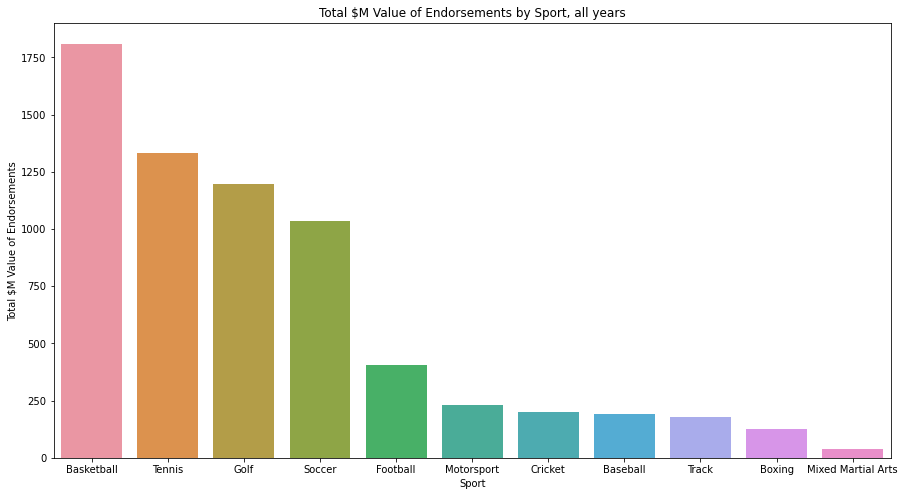

In [362]:
plt.figure(figsize = (15,8))
df_End = df.groupby('Sport')['Endorsements'].sum().reset_index()

df_End = df_End.sort_values('Endorsements',ascending=False).reset_index()

ax = sns.barplot(x='Sport', y='Endorsements', data=df_End, order=df_End['Sport'])
ax.set(xlabel='Sport', ylabel='Total $M Value of Endorsements', title='Total $M Value of Endorsements by Sport, all years')
plt.show()

One thing that immediately jumps off the page for these two charts is that Basketball leads in both Salary/Winnings and Endorsements. The next thing you notice is that while the other 2 of the 'Big 3', Baseball and Football, are very close to Basketball in terms of Salary/Winnings, they're far behind it in terms of Endorsement dollars. Football is a distant 5th in Endorsement value, and Baseball (2nd in Salary/Winnings) falls all the way to 8th!

## What does the distribution of athlete pay look like?

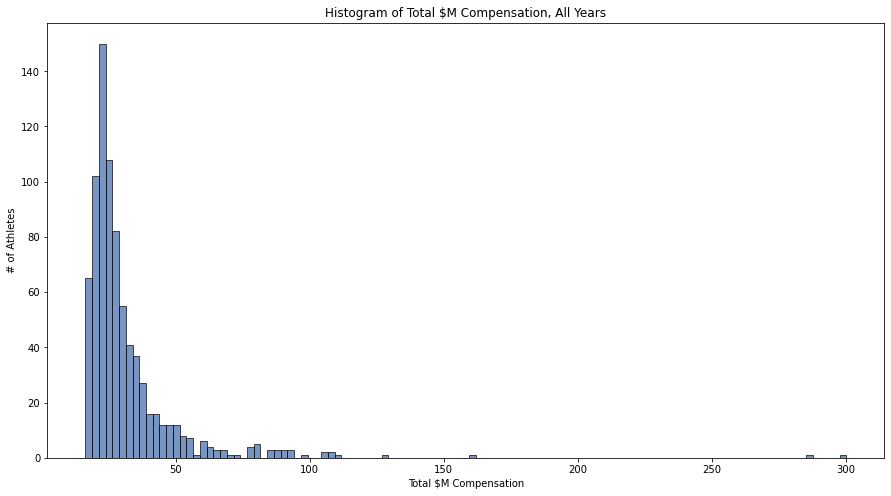

In [432]:
plt.figure(figsize = (15,8))
ax = sns.histplot(x='Pay', data=df)
ax.set(xlabel='Total $M Compensation', ylabel='# of Athletes', title='Histogram of Total $M Compensation, All Years')
plt.show()

This distribution is highly skewed, with a very tall peak near $20M, and an incredibly long tail. It turns out that each of those outliers is related to the Boxing peaks we've seen in earlier charts.

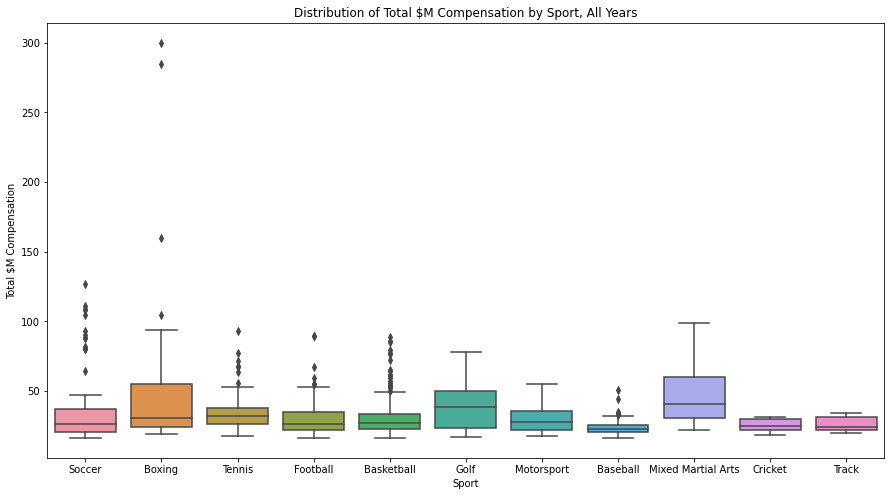

In [438]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(x='Sport', y='Pay', data=df)
ax.set(xlabel='Sport', ylabel='Total $M Compensation', title='Distribution of Total $M Compensation by Sport, All Years')
plt.show()

This box and whisker plot is an especially useful way to look at the distributions for each individual sport. We can see that Soccer and Basketball have narrow IQRs, but have a healthy number of high-end outliers as well. Boxing, as noted previously, is by far the most volatile, with outliers that actually stretch the scale of the chart. Golf and MMA both show a fairly wide IQR, indicating that those sports can have a high level of volatility as well.

## What can we see if we look only at the mix of the two compensation types for each sport?

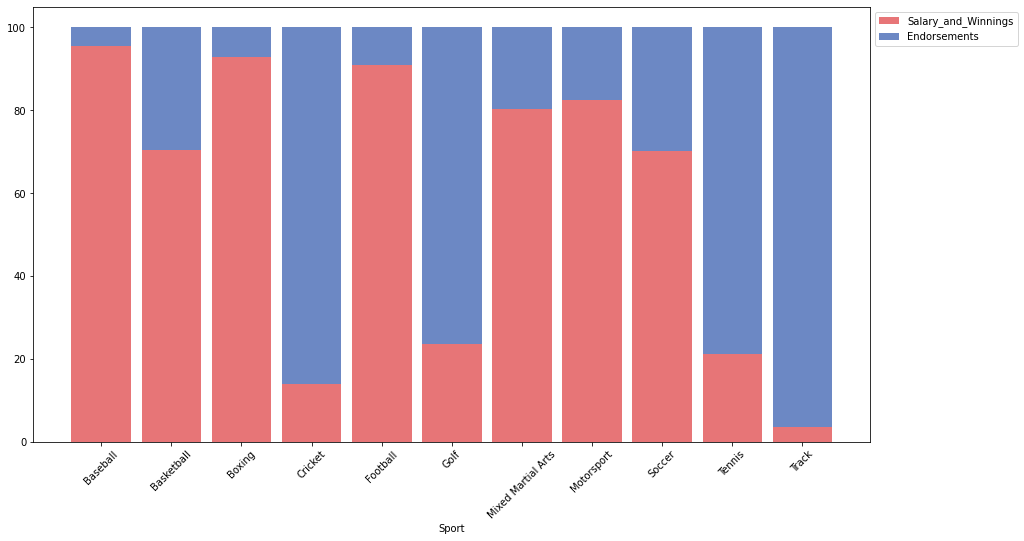

In [366]:
plt.figure(figsize = (15,8))

df_prop = df.groupby('Sport')[['Salary/Winnings', 'Endorsements']].sum().reset_index()

totals = [i+j for i,j in zip(df_prop['Salary/Winnings'], df_prop['Endorsements'])]
Salary_and_Winnings = [i / j * 100 for i,j in zip(df_prop['Salary/Winnings'], totals)]
Endorsements = [i / j * 100 for i,j in zip(df_prop['Endorsements'], totals)]

barWidth = 0.85
r = df_prop['Sport']
plt.bar(r, Salary_and_Winnings, color='#e77577', width=barWidth)
plt.bar(r, Endorsements, bottom=Salary_and_Winnings, color='#6c88c4', width=barWidth)

plt.xticks(r, rotation=45)
plt.xlabel("Sport")
plt.legend(['Salary_and_Winnings', 'Endorsements'], loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

With this new chart, we see greater detail in what we learned in the previous one. Basketball total value is ~30%, while for Baseball and Football, it's less than 10%.

We also notice that there isn't a great deal of agreement in the % breakdown among Individual sports. Sports like Track, Golf, and Tennis are all above 75% Endorsements, while Motorsport, Boxing, and MMA are all lower than 20%.

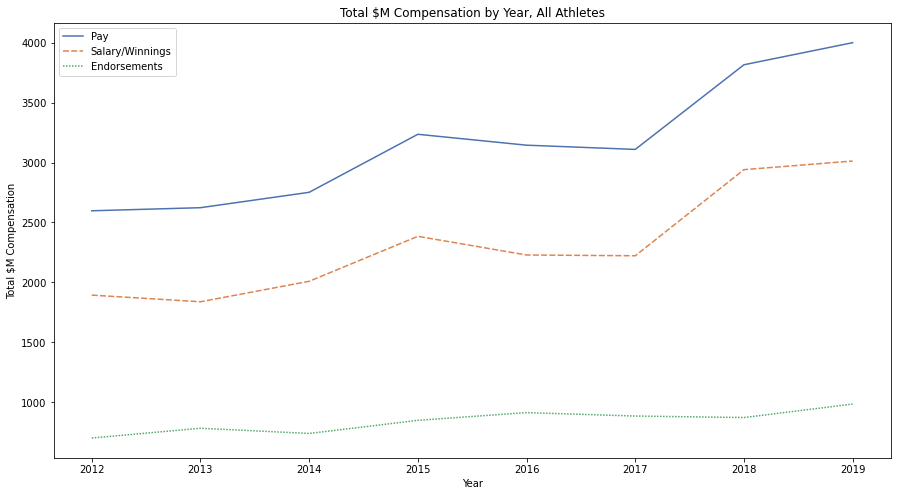

In [425]:
plt.figure(figsize = (15,8))
df_all = df.groupby('Year')[['Pay','Salary/Winnings', 'Endorsements']].sum()
ax = sns.lineplot(data=df_all)
ax.set(xlabel='Year', ylabel='Total $M Compensation', title='Total $M Compensation by Year, All Athletes')
plt.show()

This line chart shows us one more interesting trend, which is that the growth in Pay is due primarily to growth in Salary/Winnings. While Endorsement dollars are technically growing as well, the growth is far more flat.

In [393]:
df_agg = df_topten.groupby(['Year', 'Sport'])['Pay'].sum().unstack().fillna(0)
df_agg

Sport,Basketball,Boxing,Football,Golf,Mixed Martial Arts,Motorsport,Soccer,Tennis
Year,,,,,,,,
2012,105.3,147.0,42.4,107.2,0.0,0.0,88.5,52.7
2013,121.7,0.0,100.0,126.8,0.0,0.0,132.5,71.5
2014,133.8,105.0,43.8,114.4,0.0,0.0,144.7,100.7
2015,168.5,460.0,0.0,101.4,0.0,0.0,169.4,67.0
2016,183.4,0.0,53.1,105.7,0.0,0.0,169.4,105.4
2017,240.7,0.0,50.0,50.0,0.0,46.0,173.0,64.0
2018,162.4,285.0,126.8,0.0,99.0,0.0,309.0,77.2
2019,234.2,94.0,178.8,0.0,0.0,0.0,341.0,93.4


Now let's take a look at the Top Ten specifically. 

## Has the proportion of Top 10 pay between sports changed over the years?

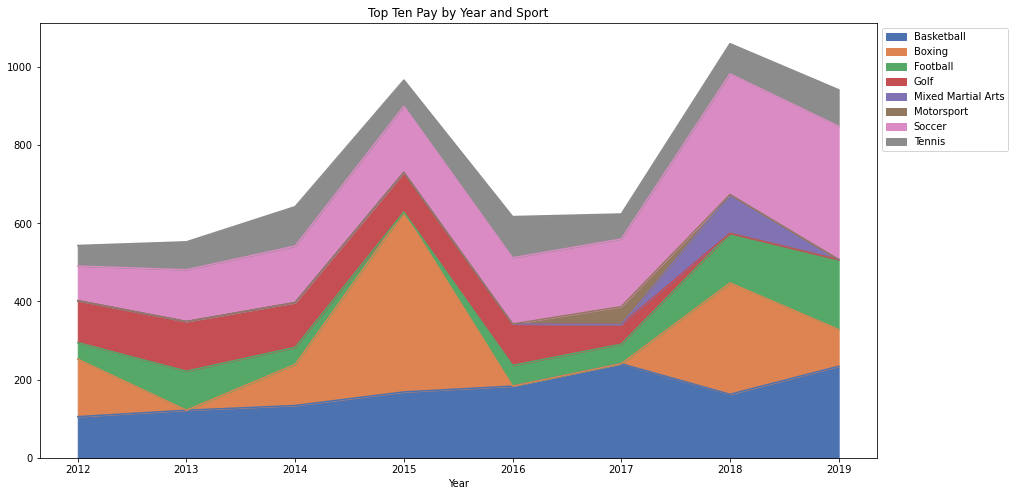

In [450]:
df_agg.plot.area(figsize=(15,8))

plt.title('Top Ten Pay by Year and Sport')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


One thing we note right away is that in addition to the two massive peaks for Boxing seen earlier, it also disappears from the Top 10 entirely in 3 of the 8 years. This implies some significant volatility. It turns out the first peak is from the fight between Floyd Mayweather and Manny Pacquiao in 2015, considered one of the highest profile fights in history. The second peak is actually the fight between Mayweather and MMA-star Conor McGregor in 2018. This is why the purple "Mixed Martial Arts" line also has its only recognizable peak.

We also see the ramp-up of mega-contracts in International Soccer causing the pink area representing soccer stars in the Top Ten to grow rapidly. There's a similar ramp visible for basketball, revealing that the increase in Basketball applies to its top-earners as well, and isn't just due to growth from the bottom.

Football is actually showing some significant Top-10 growth, from 0 in 2015, to a large green chunk in 2019.

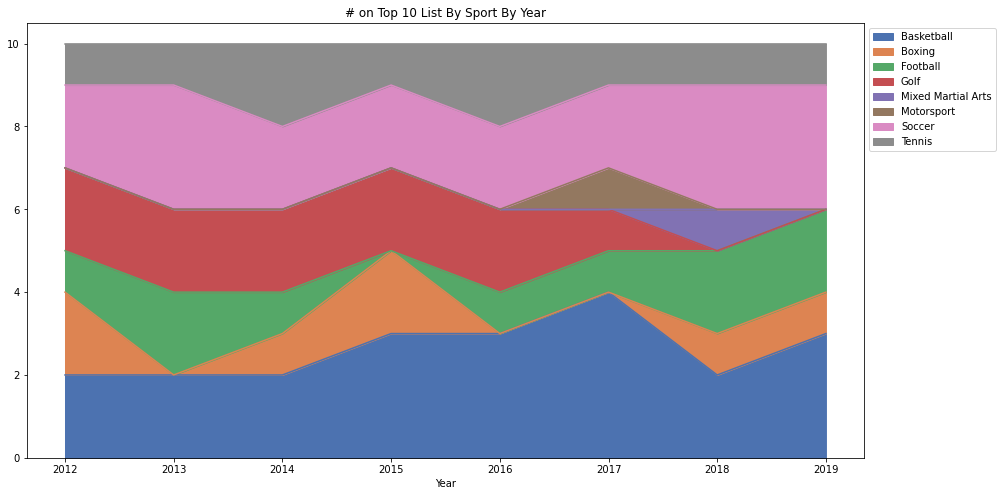

In [462]:
df_mix_topten = df_topten.groupby(['Year', 'Sport'])['Pay'].size().unstack().fillna(0)
df_mix_topten.plot.area(figsize=(15,8))

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('# on Top 10 List By Sport By Year')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

This chart, which instead of Top-10 Pay by Sport shows Top-10 representation by sport, we can see some interesting things.

Boxing, which we now know shows lots of volatility, varies between 0 and 2 each year. Motorsport has actually only had 1 Top-10 finish in all 8 years (Formula-1 driver Lewis Hamilton in 2017).

Football's share of the Top-10 seems to be on the rise, while Golf's share has been on the decline since 2017. Tennis joins Soccer and Basketball as the only other sport to consistently hold at least 1 slot in the Top-10 every year.

## Which sports have taken the top spot each year?

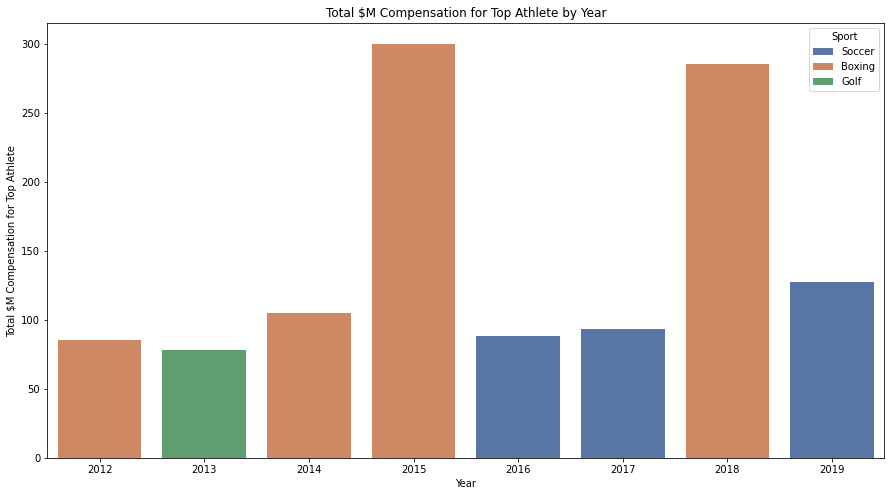

In [404]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Year', y='Pay', data=df_top, hue='Sport', dodge=False)
ax.set(xlabel='Year', ylabel='Total $M Compensation for Top Athlete', title='Total $M Compensation for Top Athlete by Year')
plt.show()

We see from this chart that a Boxer has taken the top spot for 4 of the 8 years, but that a Soccer star has led the list in 3 of the last 4 years.

Also worth noting, is that while the US "Big 3" of Baseball, Basketball, and Football take the top 3 spots in total compensation for the time period, no player from those leagues has managed to take the top spot.

Text(0.5, 1.0, 'Appearances at #1 by Name')

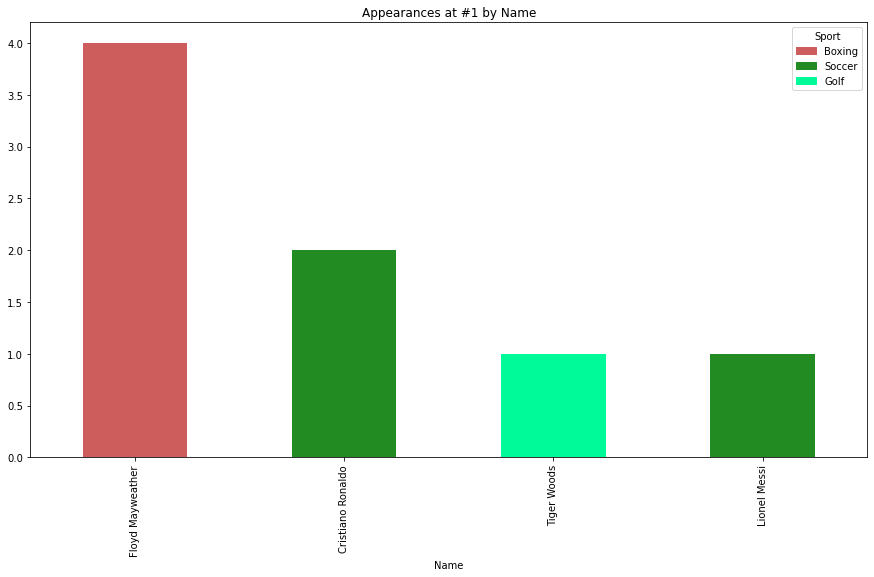

In [543]:
df_topname = df_top.groupby(['Name','Sport']).size().sort_values(ascending=False).reset_index()

labels = df_topname['Sport'].unique()
colors = {'Basketball': 'darkblue', 'Football': 'royalblue', 'Soccer': 'forestgreen', 'Boxing':'indianred', 'Golf':'mediumspringgreen', 'Tennis':'gold', 'Mixed Martial Arts':'mediumpurple', 'Motorsport':'orange'}
handles = [plt.Rectangle((0,0),1,1, color=colors[l]) for l in labels]

df_topname.plot.bar(x='Name', figsize=(15,8), color=[tuple(df_topname['Sport'].map(colors))])
plt.legend(handles, labels, title="Sport")
plt.title('Appearances at #1 by Name')

This chart puts a name to the top finishers. It turns out the Floyd "Money" Mayweather has lived up to his nickname, holding the spot as the top-earner in an astonishing 4 of the 8 years.

The 3 Soccer top-spots have been split by the two biggest in the game, with 2 going to Cristiano Ronaldo, and the other to Lionel Messi.

The lone Golf list-leader in 2013 is revealed to be none other than Tiger Woods.

## Basketball value is growing, but what about its # of athletes on the list?

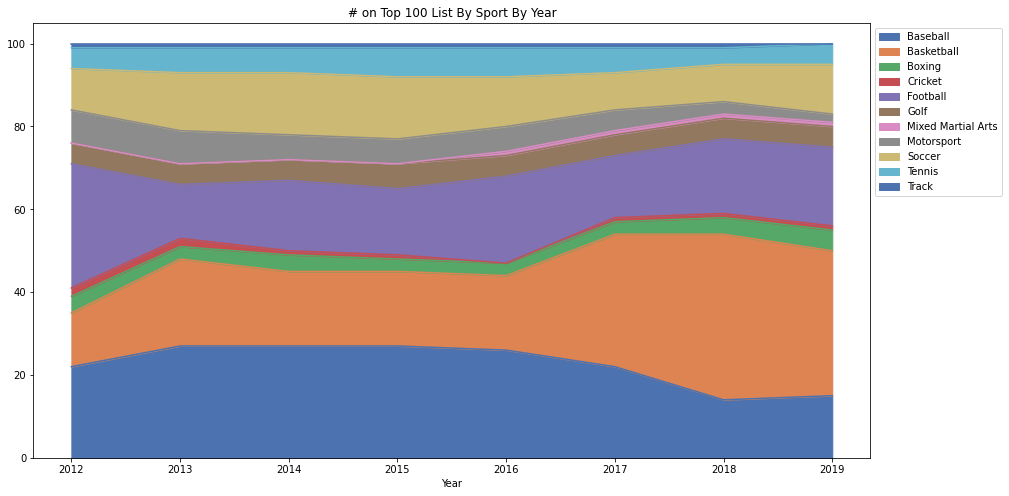

In [461]:
#df_mix = df.groupby(['Year']).size().reset_index().pivot(columns='class', index='survived', values=0)

df_mix = df.groupby(['Year', 'Sport'])['Pay'].size().unstack().fillna(0)
df_mix.plot.area(figsize=(15,8))

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('# on Top 100 List By Sport By Year')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

We see here that in addition to growth in Total Value and representation in the Top 10, its share of spots in the Top 100 is growing as well. Similarly, baseball's share is declining. Soccer seems to be becoming more top-heavy, as its share of Top 100 spots has actually declined from a 2014-2015 peak while its overall value has grown.

## Putting names to the Top Ten

Text(0.5, 1.0, 'Appearances in Top 10 by Name')

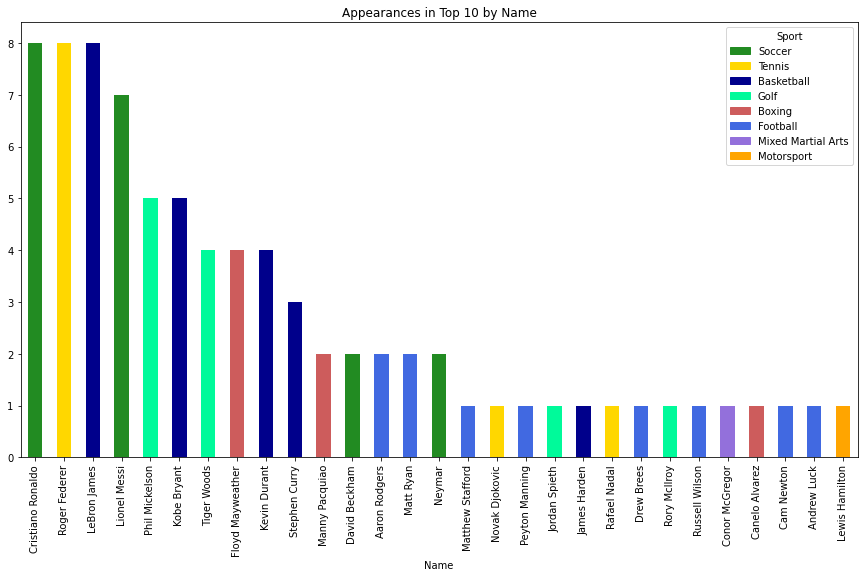

In [542]:
df_name = df_topten.groupby(['Name','Sport']).size().sort_values(ascending=False).reset_index()

labels = df_name['Sport'].unique()
colors = {'Basketball': 'darkblue', 'Football': 'royalblue', 'Soccer': 'forestgreen', 'Boxing':'indianred', 'Golf':'mediumspringgreen', 'Tennis':'gold', 'Mixed Martial Arts':'mediumpurple', 'Motorsport':'orange'}
handles = [plt.Rectangle((0,0),1,1, color=colors[l]) for l in labels]

df_name.plot.bar(x='Name', figsize=(15,8), color=[tuple(df_name['Sport'].map(colors))])
plt.legend(handles, labels, title="Sport")
plt.title('Appearances in Top 10 by Name')

#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

There are several things worth noting in this visualization of appearances in the Top Ten.

- Lebron James (Basketball) and Roger Federer (Tennis) both secured a Top-Ten spot in all 8 years, though neither has ever held the top spot. Ronaldo also went 8-for-8, but was also number one for two of those years.
- Though Mayweather holds the most #1s by far with 4, those are also the only years he managed to crack the Top Ten.
- 7 football players have made the Top Ten in this timespan (all Quarterbacks), but none have appeared more than twice.
- Lewis Hamilton in 2017 remains the lone Motorsport athlete finish in the Top Ten during these years. Same for Conor McGregor and MMA in 2018 after his match with Mayweather. 


## Conclusion

Key takeaways include:
- The NBA's pay has been increasing rapidly at all levels the last 3-4 years
- While Basketball's pay scales have increased, Baseball's have actually declined over the same time period.
- There's a large "Endorsement Gap" between Basketball and the other two major American sports (Football and Baseball)
- While the "Big 3" American sports have the largest payrolls on the whole, they're less well-represented in the Top Ten, and no athlete from any of these leagues has taken the top spot in the last 8 years.
- Boxing appears to be very top-weighted toward mega-stars like Mayweather and Pacquiao, and their appearance in the Top Ten is based primarily on a big-name fight every 2-3 years.

Hopefully you found this tour through the world of athlete pay interesting, and you're leaving with more information than you started with!